In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import textwrap
import helper_400

%load_ext autoreload
%autoreload 2
helper_400.set_sns_style()

import plotting

%load_ext autoreload
%autoreload 2
hs_dict = plotting.get_core_dict()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 800x600 with 0 Axes>

In [2]:
# set times new roman
plt.rcParams['font.family'] = 'Times New Roman'
sns.set_style("whitegrid")

In [3]:
gdf = gpd.read_file('data/usastate/tl_2020_us_state.shp')

In [4]:
gdf = gdf[gdf['STUSPS'].isin(['AZ', 'CA', 'CO', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA','WY'])]

In [8]:
df = pd.read_parquet("outputs/d2-events-2d5-230929.parquet") 
df.head()

,GEOID,wfday,heatday,smoke_pm_non_zero,smoke_pm_gt_five,hw,_hws,hs,hws,ws,...,wfday_2d,_hws_2d,hs_2d,hws_2d,ws_2d,hw_2d,smoke_pm_gt_five_2d,hs_2d_5,ws_2d_5,hws_2d_5
time,,,,,,,,,,,,,,,,,,,,,
2006-01-01,04001942600,False,False,False,False,False,False,False,False,False,...,0,False,0,0,0,0,0,0,0,0
2006-01-01,04001942700,False,False,False,False,False,False,False,False,False,...,0,False,0,0,0,0,0,0,0,0
2006-01-01,04001944000,False,False,False,False,False,False,False,False,False,...,0,False,0,0,0,0,0,0,0,0
2006-01-01,04001944100,False,False,False,False,False,False,False,False,False,...,0,False,0,0,0,0,0,0,0,0
2006-01-01,04001944201,False,False,False,False,False,False,False,False,False,...,0,False,0,0,0,0,0,0,0,0


In [2]:
data = gpd.read_file("outputs/d2-events-2d-230929_SVI_shapefile.geojson")
# Step 1: Filter Top 50 geoid by Exposure in Each State
top_geoid_per_state = data.groupby('ST_ABBR').apply(lambda x: x.nlargest(100, 'hws'))
top_geoid_per_state.head()

ST    STATE ST_ABBR STCNTY    COUNTY         FIPS  \
ST_ABBR                                                          
AZ      120  04  Arizona      AZ  04011  Greenlee  04011960100   
        75   04  Arizona      AZ  04005  Coconino  04005001500   
        110  04  Arizona      AZ  04007      Gila  04007940400   
        118  04  Arizona      AZ  04009    Graham  04009961600   
        111  04  Arizona      AZ  04009    Graham  04009940500   

                                                LOCATION    AREA_SQMI  \
ST_ABBR                                                                 
AZ      120  Census Tract 9601, Greenlee County, Arizona  1277.334491   
        75     Census Tract 15, Coconino County, Arizona  2670.191015   
        110      Census Tract 9404, Gila County, Arizona  1008.779499   
        118    Census Tract 9616, Graham County, Arizona  1277.688975   
        111    Census Tract 9405, Graham County, Arizona  1684.663596   

             E_TOTPOP  M_TOTPOP  ...  hws5  ws5  heatday_2d  \
ST_ABBR                          ...                          
AZ      120      2643       346  ...     9   36         296   
        75       2957       427  ...     3   19         186   
        110      5873       494  ...     9   18         244   
        118      2962       424  ...    14   20         259   
        111      4698       334  ...     4   12         252   

             smoke_pm_non_zero_2d  wfday_2d  _hws_2d  hs_2d  hws_2d  ws_2d  \
ST_ABBR                                                                      
AZ      120                  1039       351     1261    159      35    264   
        75                   1532       927     1887    118      40    633   
        110                   686       168      867    115      32    111   
        118                   569       238      843    118      29     98   
        111                  1025       283     1204    132      29    220   

                                                      geometry  
ST_ABBR                                                         
AZ      120  MULTIPOLYGON (((-109.49570 33.18048, -109.4955...  
        75   MULTIPOLYGON (((-111.74845 34.96031, -111.7486...  
        110  MULTIPOLYGON (((-110.75277 33.17056, -110.7422...  
        118  MULTIPOLYGON (((-110.45152 32.51400, -110.4492...  
        111  MULTIPOLYGON (((-110.45797 33.29433, -110.4571...  

[5 rows x 181 columns]

In [3]:
# Step 2: Identify the 5 States for Plotting (assuming the top 5 states by total exposure)
top_states = data.groupby('ST_ABBR')['hws'].sum().nlargest(5).index
top_states

Index(['CA', 'AZ', 'OR', 'ID', 'NM'], dtype='object', name='ST_ABBR')

In [4]:
top_geoid_per_state = top_geoid_per_state[top_geoid_per_state['ST_ABBR'].isin(top_states)]
top_geoid_per_state = top_geoid_per_state.reset_index(drop=True)

In [9]:
unique_geo_ids = top_geoid_per_state['FIPS'].unique()
df = df[df['GEOID'].isin(unique_geo_ids)]
df.head()

,GEOID,wfday,heatday,smoke_pm_non_zero,smoke_pm_gt_five,hw,_hws,hs,hws,ws,...,wfday_2d,_hws_2d,hs_2d,hws_2d,ws_2d,hw_2d,smoke_pm_gt_five_2d,hs_2d_5,ws_2d_5,hws_2d_5
time,,,,,,,,,,,,,,,,,,,,,
2006-01-01,04001942600,False,False,False,False,False,False,False,False,False,...,0,False,0,0,0,0,0,0,0,0
2006-01-01,04001942700,False,False,False,False,False,False,False,False,False,...,0,False,0,0,0,0,0,0,0,0
2006-01-01,04001944000,False,False,False,False,False,False,False,False,False,...,0,False,0,0,0,0,0,0,0,0
2006-01-01,04001944100,False,False,False,False,False,False,False,False,False,...,0,False,0,0,0,0,0,0,0,0
2006-01-01,04001944201,False,False,False,False,False,False,False,False,False,...,0,False,0,0,0,0,0,0,0,0


In [10]:
df = df.reset_index()
df['time'] = pd.to_datetime(df['time'])
# Extract the year from the time column
df['year'] = df['time'].dt.year

In [11]:
exposure_counts = df[df['hws']].groupby(['GEOID', 'year']).size().reset_index(name='days_of_exposure')
exposure_counts.head()

,GEOID,year,days_of_exposure
0,04001944901,2007,1
1,04001944901,2009,1
2,04003000101,2017,4
3,04003000102,2011,1
4,04003000201,2015,1


In [12]:
pivot_table = exposure_counts.pivot(index='GEOID', columns='year', values='days_of_exposure').fillna(0)
pivot_table.head()

year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
GEOID,,,,,,,,,,,,,,,
04001944901,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04003000101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
04003000102,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04003000201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
04003000304,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
pivot_table = pivot_table.reset_index()
pivot_table = pivot_table.merge(top_geoid_per_state[['FIPS', 'ST_ABBR']], left_on='GEOID', right_on='FIPS')
pivot_table.head()

,GEOID,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,FIPS,ST_ABBR
0,04001944901,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,04001944901,AZ
1,04003000101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,04003000101,AZ
2,04003000102,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,04003000102,AZ
3,04003000201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,04003000201,AZ
4,04003000304,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,04003000304,AZ


In [14]:
pivot_table = pivot_table.drop(columns=['FIPS'])

In [15]:
pivot_table.head()

,GEOID,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,ST_ABBR
0,04001944901,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AZ
1,04003000101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,AZ
2,04003000102,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AZ
3,04003000201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,AZ
4,04003000304,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AZ


In [16]:
pivot_table["total_exposure"] = pivot_table[pivot_table.columns[1:-2]].sum(axis=1)
# sort by total exposure
pivot_table = pivot_table.sort_values(by='total_exposure', ascending=False)

In [17]:
sns.set_style("whitegrid") #white

In [18]:
def annotate_bar1(ax, text, bar_idx, offset_x=-0.4, offset_y=5, bar_hight=1):
    # x coordinate for the bar, adjusting to position the text box
    x = bar_idx + offset_x
    # y coordinate for the bar, using the height of the bar plus a different offset
    y = bar_hight + offset_y
    
    # Add annotation with a thin black line
    ax.annotate(text, xy=(bar_idx, bar_hight), xytext=(x, y),
                textcoords="offset points",  # Specify text coordinates
                arrowprops=dict(arrowstyle="->", color='black', lw=0.5), # Use arrow with head
                bbox=dict(boxstyle="round,pad=0.3", ec="black", fc="white", lw=0.5),
                ha='right', fontsize=7)  # Align text to the right for consistency

# Annotate the first, second, and third bars with adjusted offsets


In [19]:
pivot_table['GEOID'] = pivot_table['GEOID'].astype(str)

In [20]:
pivot_table["total_exposure"] = pivot_table[pivot_table.columns[1:-2]].sum(axis=1)
# sort by total exposure
pivot_table = pivot_table.sort_values(by='total_exposure', ascending=False)
pivot_table.head()

,GEOID,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,ST_ABBR,total_exposure
258,35017964100,0.0,4.0,0.0,0.0,2.0,0.0,1.0,9.0,0.0,3.0,3.0,2.0,0.0,0.0,1.0,NM,25.0
306,41019210000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,8.0,6.0,0.0,1.0,OR,22.0
169,06093001300,1.0,0.0,6.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0,0.0,CA,22.0
349,41045970900,2.0,4.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,OR,21.0
246,35003976401,0.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,2.0,4.0,5.0,0.0,3.0,NM,21.0


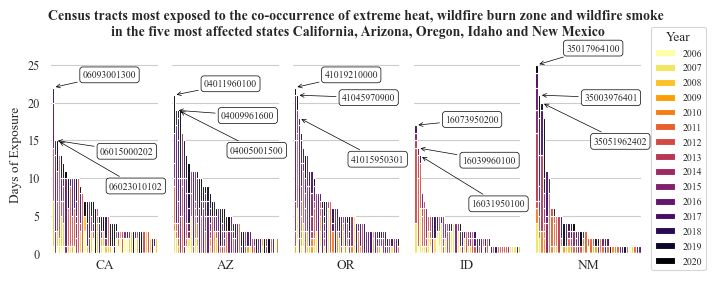

In [37]:
# Step 3: Create Subplots for Each of the 5 States
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(7.25, 3), sharey=True)

# times new roman
plt.rcParams['font.family'] = 'Times New Roman'

for i, state in enumerate(top_states):
    state_data = pivot_table[pivot_table['ST_ABBR']==state]

    # Assuming 'state_data' is your DataFrame and you've already sorted it and reset the index
    sorted_state_data = state_data.sort_values(by='total_exposure', ascending=False).reset_index(drop=True).head(50).copy()

    # Extract the 'GEOID' and relevant columns for plotting
    plot_data = sorted_state_data[pivot_table.columns[0:-1]]

    #plot_data.plot(x='GEOID', kind='bar', stacked=True, ax=axes[i], width=1)

    # Now, when plotting, the bars should reflect the sorted order because the index has been realigned
     
    #plot_data.plot(x='GEOID', kind='bar', stacked=True, ax=axes[i], width=1)
    #plot_data['GEOID'] = plot_data['GEOID'].astype(str)
    plot_data.set_index('GEOID').plot(kind='bar', stacked=True, ax=axes[i], width=1, cmap='inferno_r')  # Set bar width to 1 for 100% width

    
    axes[i].set_xlabel(state)
    axes[i].set_ylabel('Days of Exposure')
    axes[i].tick_params(axis='x', labelbottom=False)  # Remove xticklabels
    if i < len(top_states)-1:
        axes[i].legend().set_visible(False)  # Hide the legend
    sns.despine(ax=axes[i], left=True, bottom=True)  # Remove the left and bottom spines
    # Access the current axis
    ax = axes[i] # plt.gca()

    # Disable vertical grid lines
    ax.xaxis.grid(False)

    # Optionally, ensure that the grid lines are behind the plot elements
    ax.set_axisbelow(True)

    annotate_bar1(ax, f'{sorted_state_data["GEOID"].iloc[0]}', 0, 
                  offset_x=60, offset_y=-15, bar_hight=sorted_state_data['total_exposure'].iloc[0])
    annotate_bar1(ax, f'{sorted_state_data["GEOID"].iloc[1]}', 1, 
                  offset_x=70, offset_y=-25, bar_hight=sorted_state_data['total_exposure'].iloc[1])
    annotate_bar1(ax, f'{sorted_state_data["GEOID"].iloc[2]}', 2, 
                  offset_x=74, offset_y=-50, bar_hight=sorted_state_data['total_exposure'].iloc[2])

#plt.legend(loc='upper right', bbox_to_anchor=(0, 0),  ncol=3, fontsize=8, title='Year')
plt.legend(loc='center left', ncol=1, fontsize=7, title='Year', bbox_to_anchor=(1.05, 0.53))

# Adjust layout to make room for the legend below the subplot
#plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(wspace=0.01)  # Adjust these values as needed

plt.suptitle('Census tracts most exposed to the co-occurrence of extreme heat, wildfire burn zone and wildfire smoke \nin the five most affected states California, Arizona, Oregon, Idaho and New Mexico', 
             fontsize=10, ha='center',  fontweight='bold', x=0.5, y=.92) 

plt.tight_layout()
#plt.savefig('figures/sorted_states_ct2.png', dpi=300, bbox_inches='tight')
plt.savefig('figures/pdf/fig6.pdf', format="pdf", dpi=300, bbox_inches='tight')
plt.show()